In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the file
df = pd.read_csv('AAPL.csv')

# Sort DataFrame by date
df = df.sort_values('Date')

N1 = 7600

# Double check the result
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600.0


# Plotting stock history

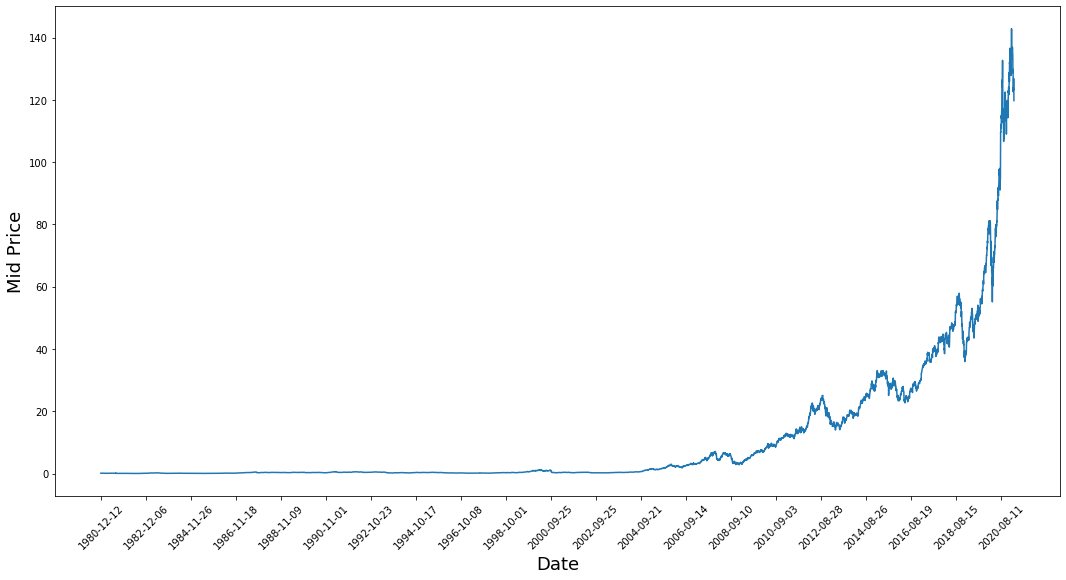

In [3]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [4]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].to_numpy()
low_prices = df.loc[:,'Low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

In [5]:
train_data = mid_prices[:N1]
test_data = mid_prices[N1:]

print(len(train_data))
print(len(test_data))
print(N1)

7600
2543
7600


In [6]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

import math

print(any(math.isnan(x) for x in train_data[0]))
print(any(math.isnan(x) for x in test_data[0]))

False
False


In [7]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 1500
for di in range(0,7600,smoothing_window_size):
    print(str(di) + " -- " + str(smoothing_window_size))
    print("len -> " + str(len(train_data[di:di+smoothing_window_size, :])))
    
    scaler.fit(train_data[di:di+smoothing_window_size, :])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
#     scaler.fit(train_data[di:di+smoothing_window_size,:])
#     train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
print(str(di) + " -- " + str(smoothing_window_size))
scaler.fit(train_data[di:di+smoothing_window_size:,:])
train_data[di:di+smoothing_window_size:,:] = scaler.transform(train_data[di:di+smoothing_window_size:,:])

print(any(math.isnan(x) for x in train_data[0]))
print(any(math.isnan(x) for x in test_data[0]))

0 -- 1500
len -> 1500
1500 -- 1500
len -> 1500
3000 -- 1500
len -> 1500
4500 -- 1500
len -> 1500
6000 -- 1500
len -> 1500
7500 -- 1500
len -> 100
7500 -- 1500
False
False


In [8]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

test_data = scaler.transform(test_data).reshape(-1)

In [9]:
print(any(math.isnan(x) for x in train_data))
print(any(math.isnan(x) for x in test_data))

print(train_data)
print(test_data)

True
False
[0.34803825 0.31862842 0.27941093 ... 0.83995764 0.90586738 0.96760189]
[ 12.277143   12.105893   12.041786  ... 123.7749975 121.1100005
 119.755001 ]


In [11]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
print(train_data)

EMA = 0.0
gamma = 0.1
for ti in range(N1):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
# all_mid_data = np.concatenate([train_data,test_data],axis=0)


print(train_data)

[0.34803825 0.31862842 0.27941093 ... 0.83995764 0.90586738 0.96760189]
[0.03480382 0.06318628 0.08480875 ...        nan        nan        nan]


In [ ]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

print(N)
for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))